In [1]:
###importing necessary libraries 
import os 
import librosa
import matplotlib.pyplot as plt
import tensorflow  as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session



In [2]:
###Melspectrogram Visualization
#plotting Melspectgoram of Entire Audio
def plot_melspectrogram(y,sr):
    #compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #convert to decibels(log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)#convert power spectrogram to decibel dB units
    #visualize to the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

In [3]:
random_file_name = "genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)


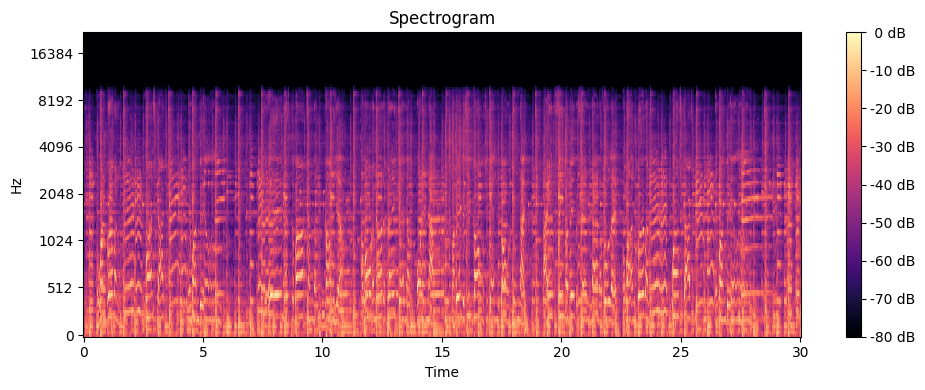

In [4]:
plot_melspectrogram(y,sr)

In [5]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2 # 2 second overlap to preserve information

    #convert duration to sample 
    chunk_samples = chunk_duration*sr
    overlap_samples = overlap_duration * sr

    #calculate num of chunks within a sample
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples))) + 1

    #iterate over each chunks
    #we chunk the 30 sec data to have a large training sample
    # and precise pattern recognition of neural network
    for i in range(num_chunks):
        #calculate start and end indices of the chunk
        start = i *(chunk_samples - overlap_samples)
        end = start + chunk_samples
        #Extract the chunk audio
        
        chunk = y[start:end]
        
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)#convert power spectrogram to decibel dB units
        #visiualize
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()
            

(128, 345)


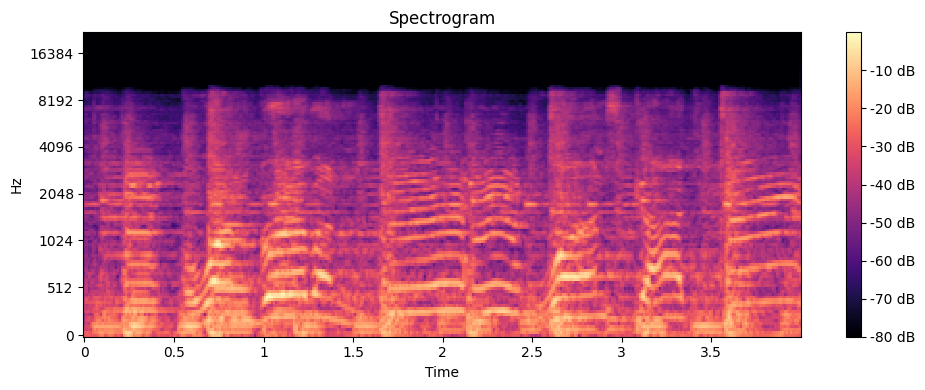

(128, 345)


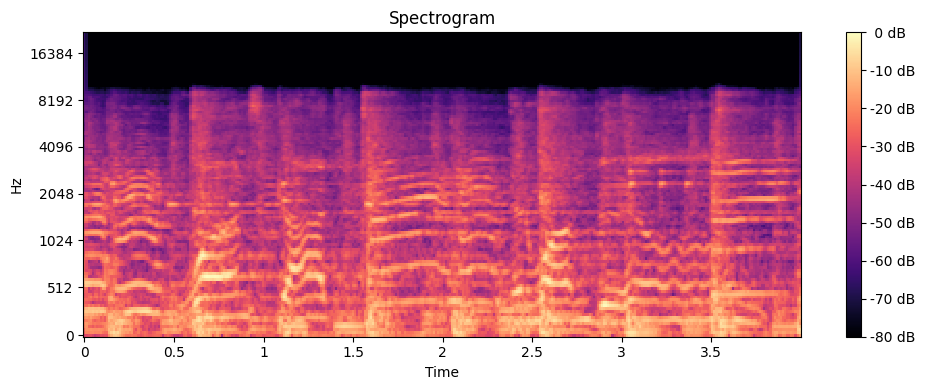

(128, 345)


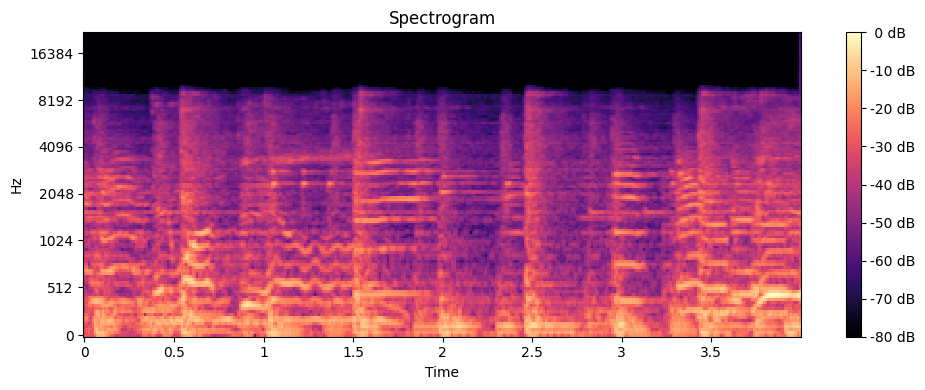

(128, 345)


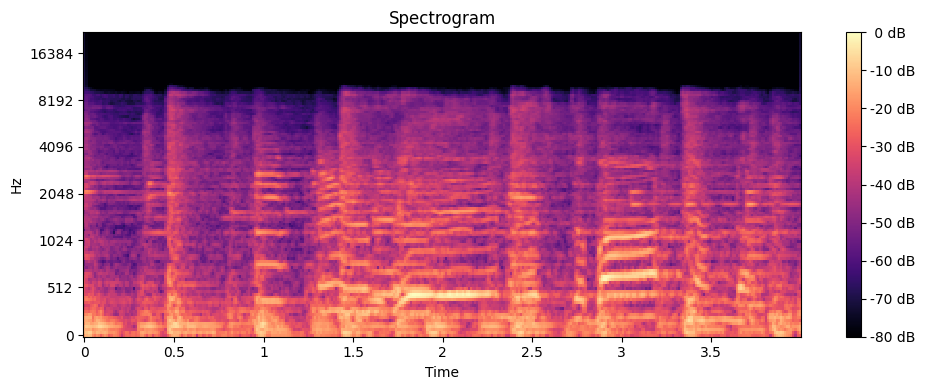

(128, 345)


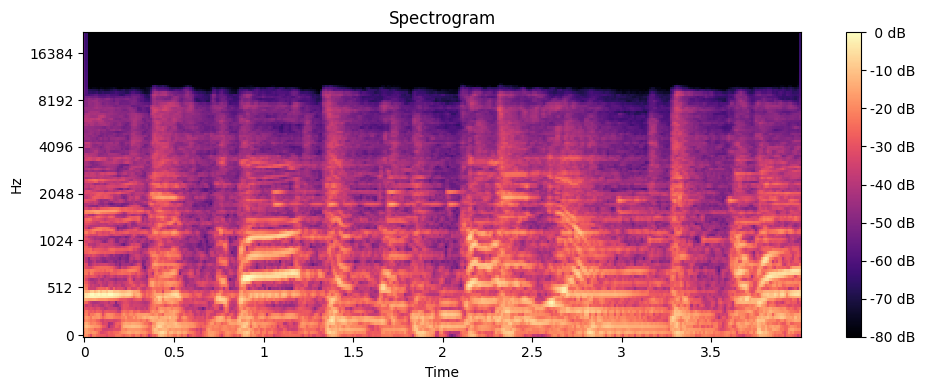

(128, 345)


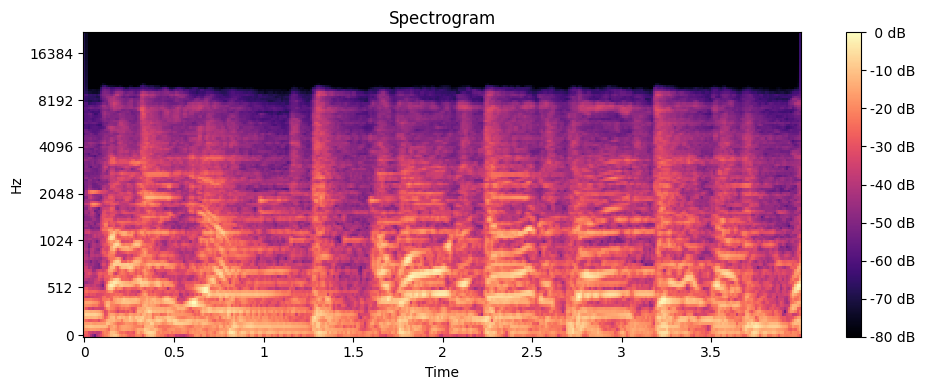

(128, 345)


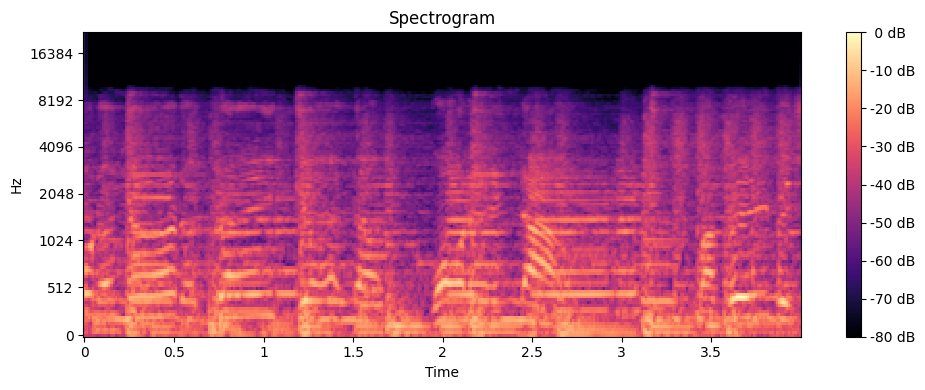

(128, 345)


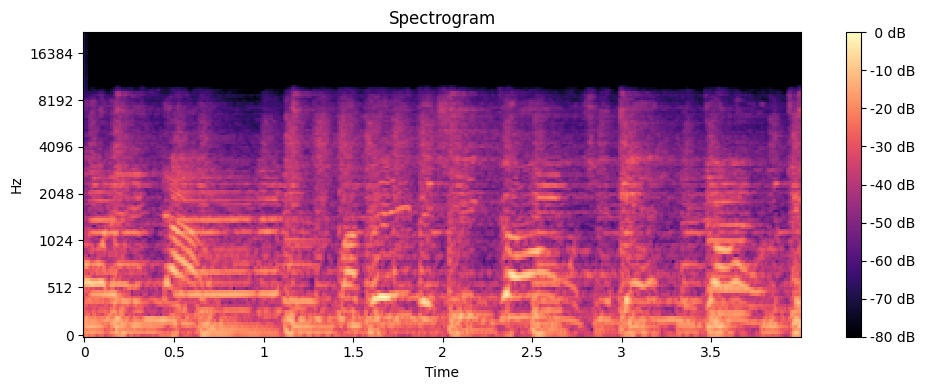

(128, 345)


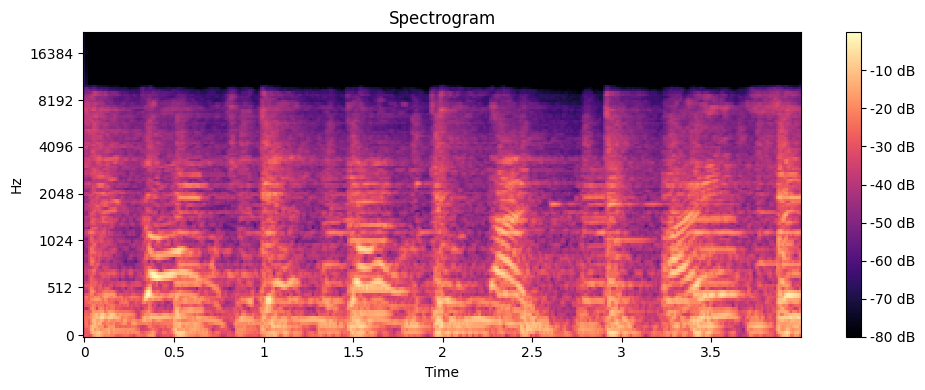

(128, 345)


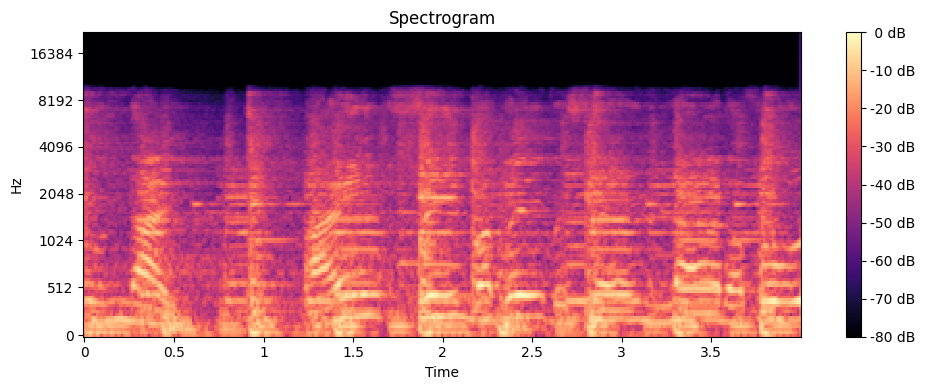

(128, 345)


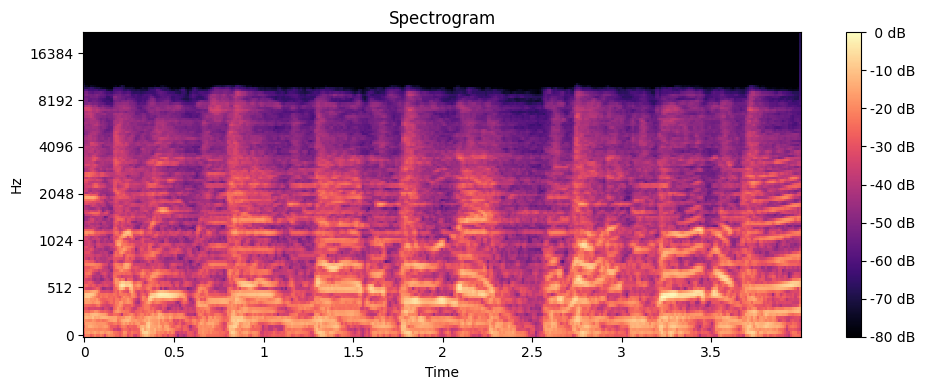

(128, 345)


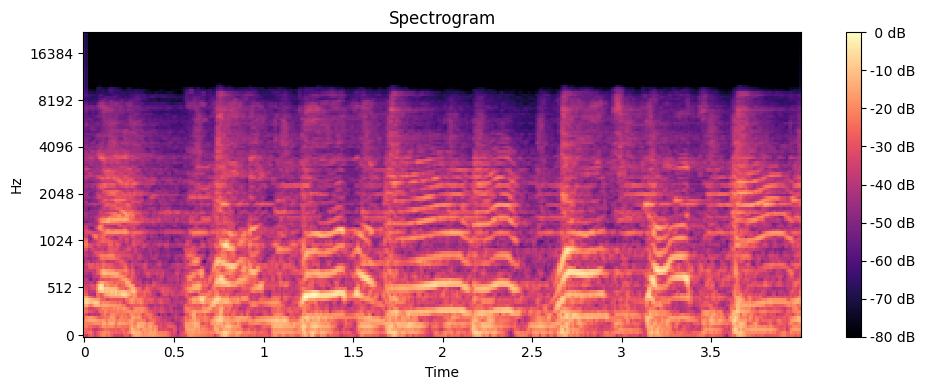

(128, 345)


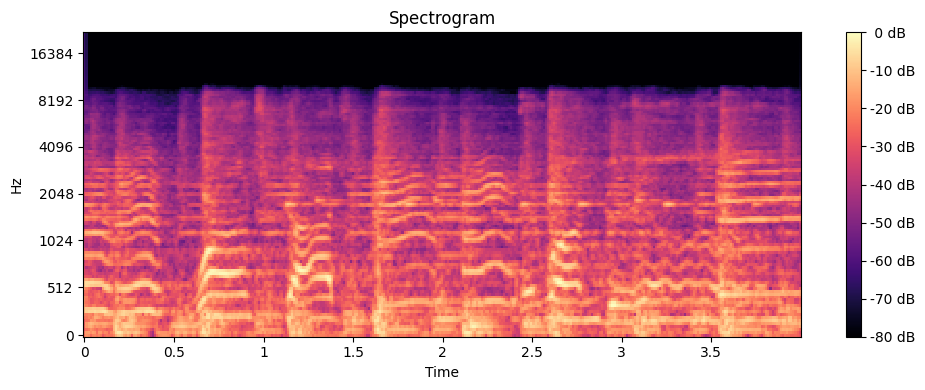

(128, 345)


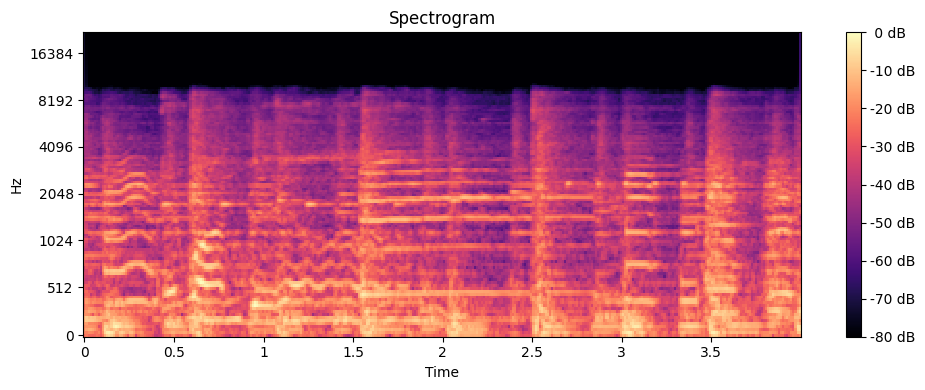

(128, 174)


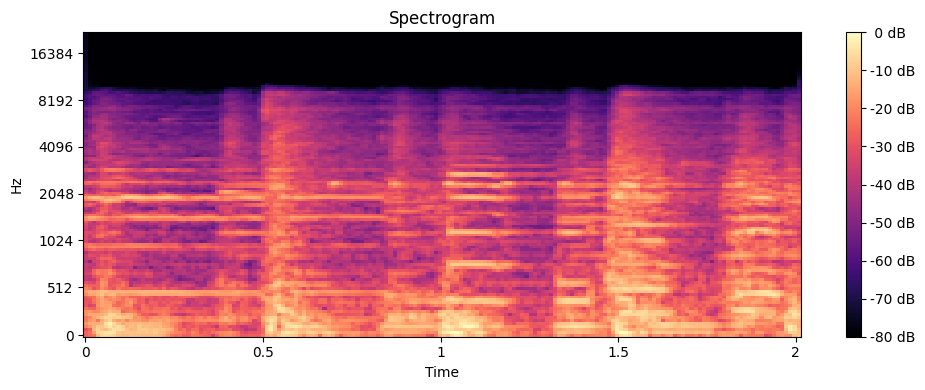

In [6]:
random_file_name = "genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)
plot_melspectrogram_chunks(y,sr)